In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Hyperparameters
BATCH = 64
num_epochs = 5
SAVE_PATH = "./DenseNet_model.h5"
num_classes = 10


data_transform = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Lambda(lambda x: tf.image.resize(x, (32, 32))),
    layers.Lambda(lambda x: tf.image.grayscale_to_rgb(x))
])
    
rayscale_to_rgb(x))])  # Convert grayscale to RGB

# create test and train images
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = np.expand_dims(train_images, axis=-1)  # Add channel dimension
train_images = data_transform(train_images.astype(np.float32))

test_images = np.expand_dims(test_images, axis=-1)  # Add channel dimension
test_images = data_transform(test_images.astype(np.float32))

train_labels = tf.keras.utils.to_categorical(train_labels, num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)

# Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(60000).batch(BATCH)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(BATCH)





Epoch 1/5
938/938 [==============================] - 539s 542ms/step - loss: 0.1183 - accuracy: 0.9638
Epoch 2/5
938/938 [==============================] - 507s 540ms/step - loss: 0.0491 - accuracy: 0.9852
Epoch 3/5
938/938 [==============================] - 507s 541ms/step - loss: 0.0373 - accuracy: 0.9885
Epoch 4/5
938/938 [==============================] - 502s 535ms/step - loss: 0.0358 - accuracy: 0.9893
Epoch 5/5
938/938 [==============================] - 500s 533ms/step - loss: 0.0319 - accuracy: 0.9900


/usr3/graduate/smkelley/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Finished Training
157/157 [==============================] - 14s 74ms/step - loss: 0.0560 - accuracy: 0.9852
Test Accuracy: 98.52%
157/157 [==============================] - 13s 74ms/step


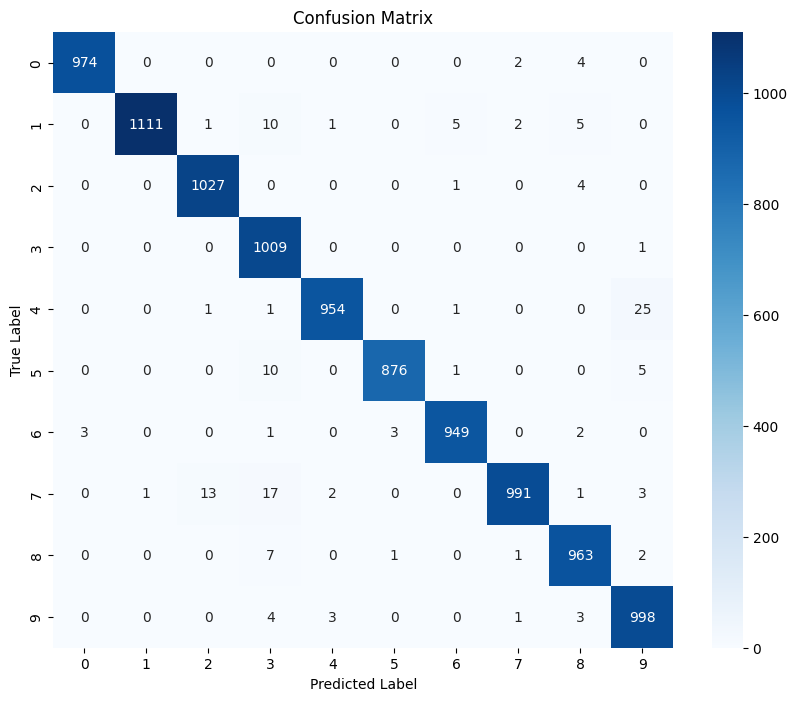

In [2]:
# MODEL:
# initialize Densenet121 Architecture/ model
base_model = tf.keras.applications.DenseNet121(include_top=False, weights=None, input_shape=(32, 32, 3))
base_model.trainable = True  # Freeze the pretrained weights

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
#     layers.MaxPooling2D(pool_size=(1,1)),
    layers.Dense(num_classes, activation='softmax')])


# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_dataset, epochs=num_epochs)

# Save model
model.save(SAVE_PATH)
# torch.save(model.state_dict(), SAVE_PATH)


print('Finished Training')

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Get predictions and true labels for the confusion matrix
all_labels = np.argmax(test_labels, axis=1)
all_predictions = np.argmax(model.predict(test_dataset), axis=1)

# Create confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)

# Display confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [4]:
# import matplotlib.pyplot as plt

# # Choose an index for a single image
# index = 0

# # Original MNIST image
# original_image = tf.squeeze(test_images[index])
# plt.subplot(1, 2, 1)
# plt.imshow(original_image, cmap='gray')
# plt.title('Original')
# plt.axis('off')

# # Resized image
# resized_image = data_transform(test_images[index:index+1].numpy()).numpy().squeeze()
# plt.subplot(1, 2, 2)
# plt.imshow(resized_image)
# plt.title('Resized')
# plt.axis('off')

# plt.show()

(None, 10)
(60000, 10)
